In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

df = pd.read_csv("/content/cleaned_air_quality.csv")

# detect date column or create index time
date_cols = [c for c in df.columns if "date" in c.lower() or "time" in c.lower()]
date_col = date_cols[0] if date_cols else "_index_time"
if date_col in df.columns:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
else:
    df["_index_time"] = np.arange(len(df))

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
col1 = num_cols[0]
col2 = num_cols[1] if len(num_cols) > 1 else num_cols[0]


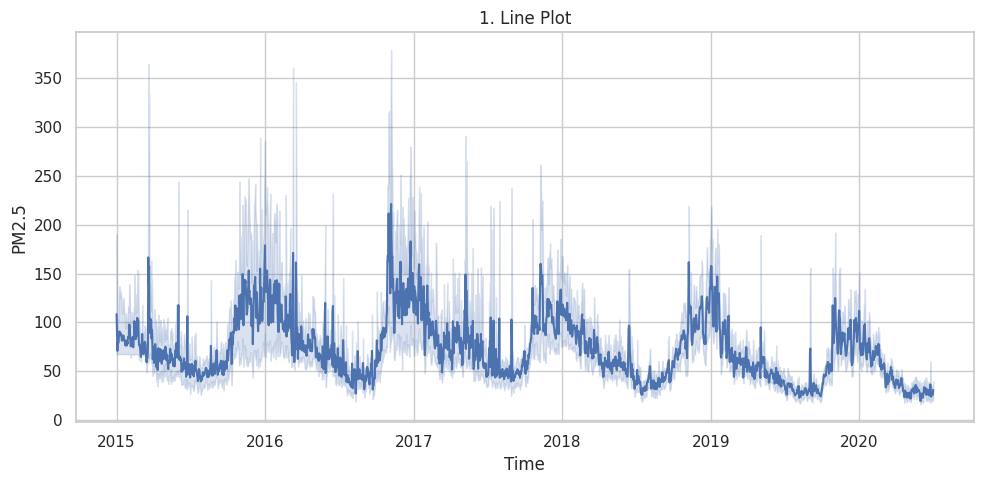

In [2]:
#1. Line Plot
sns.lineplot(data=df, x=date_col, y=col1)
plt.title("1. Line Plot")
plt.xlabel("Time")
plt.ylabel(col1)
plt.tight_layout()
plt.show()

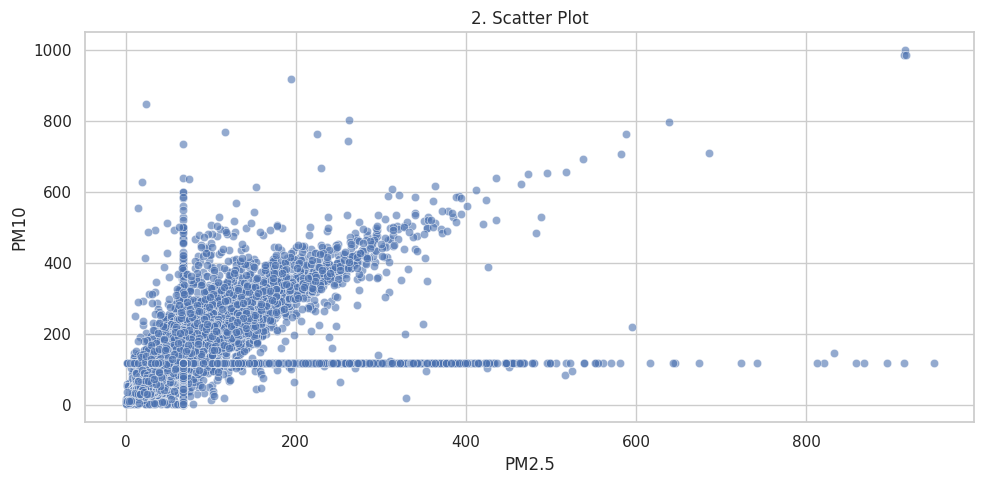

In [3]:
#2. Scatter Plot
sns.scatterplot(data=df, x=col1, y=col2, alpha=0.6)
plt.title("2. Scatter Plot")
plt.xlabel(col1)
plt.ylabel(col2)
plt.tight_layout()
plt.show()

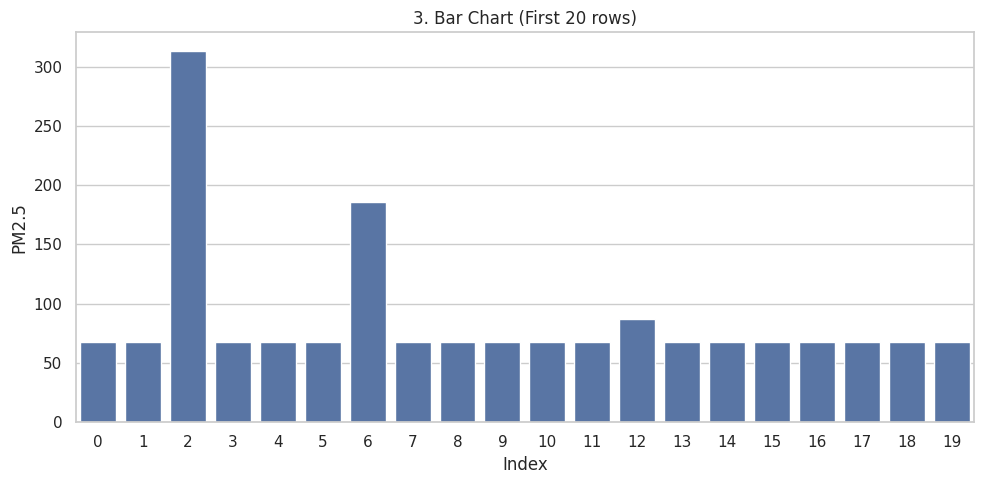

In [4]:
#3. Bar Chart
# show first 20 values as a simple bar chart
sns.barplot(x=df.index[:20], y=df[col1].head(20))
plt.title("3. Bar Chart (First 20 rows)")
plt.xlabel("Index")
plt.ylabel(col1)
plt.tight_layout()
plt.show()

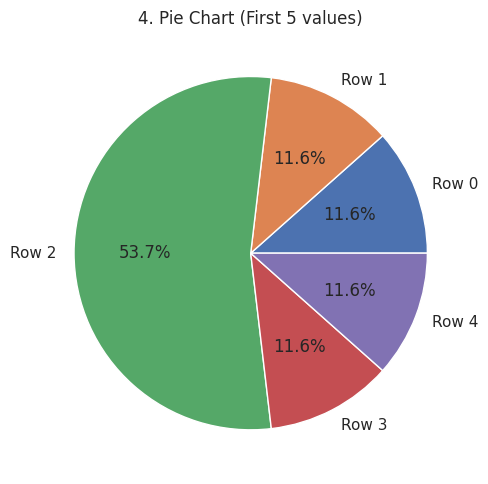

In [5]:
#4. Pie Chart
# seaborn doesn't have a pie API — use matplotlib (it's fine inside a seaborn-style notebook)
vals = df[col1].dropna().head(5)
labels = [f"Row {i}" for i in vals.index]
plt.pie(vals, labels=labels, autopct="%1.1f%%")
plt.title("4. Pie Chart (First 5 values)")
plt.tight_layout()
plt.show()

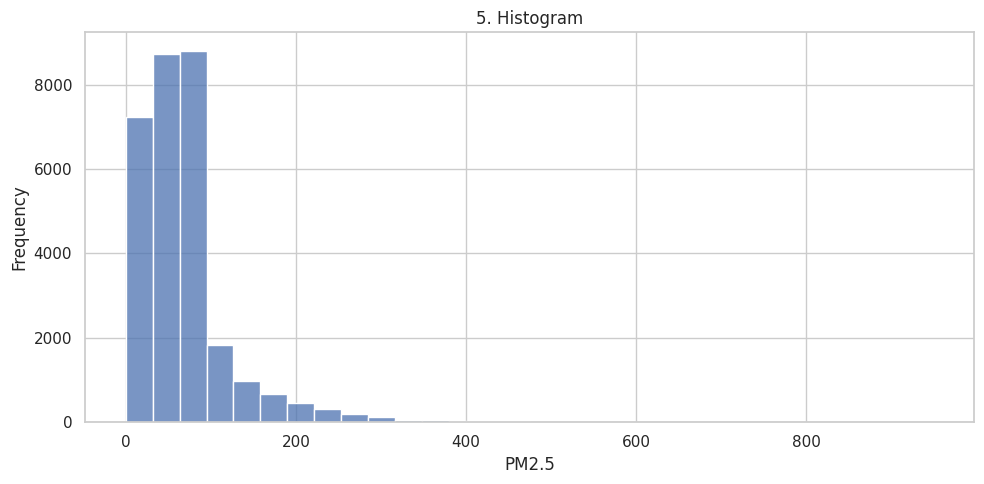

In [6]:
#5. Histogram
sns.histplot(data=df, x=col1, bins=30, kde=False)
plt.title("5. Histogram")
plt.xlabel(col1)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

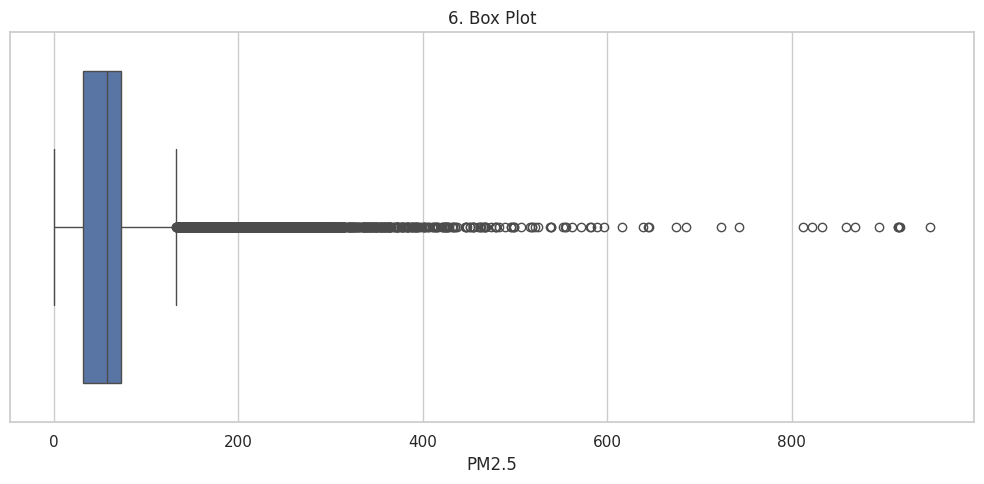

In [7]:
#6. Box Plot
sns.boxplot(x=df[col1].dropna())
plt.title("6. Box Plot")
plt.xlabel(col1)
plt.tight_layout()
plt.show()

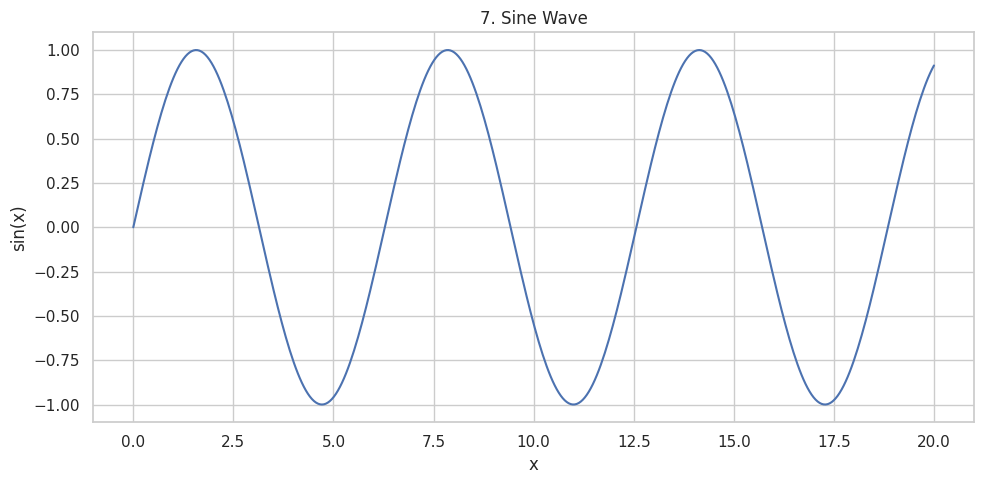

In [8]:
#7. Sine Wave
x = np.linspace(0, 20, 400)
y = np.sin(x)
sns.lineplot(x=x, y=y)
plt.title("7. Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.tight_layout()
plt.show()

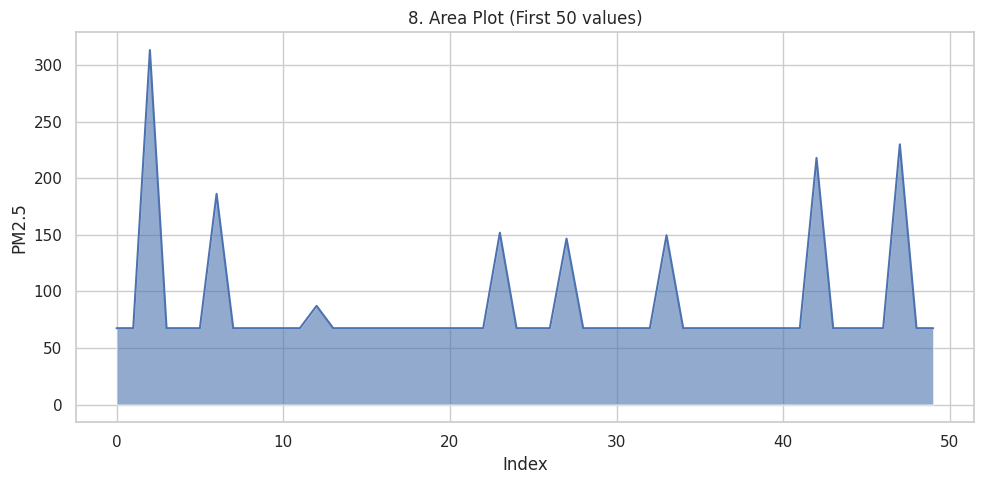

In [9]:
#8. Area Plot
# area of first 50 values
x = np.arange(50)
y = df[col1].head(50).fillna(0).values
plt.fill_between(x, y, alpha=0.6)
sns.lineplot(x=x, y=y)  # overlay line for clarity
plt.title("8. Area Plot (First 50 values)")
plt.xlabel("Index")
plt.ylabel(col1)
plt.tight_layout()
plt.show()

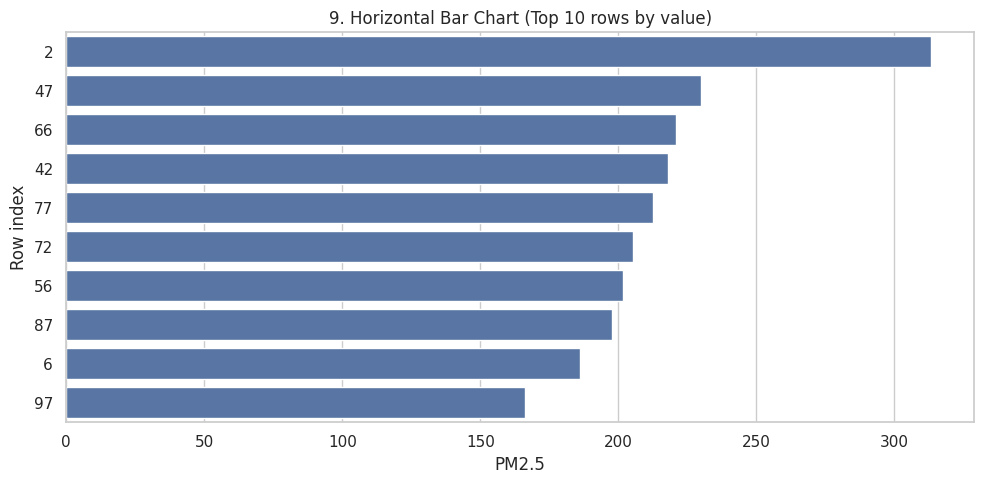

In [10]:
#9. Horizontal Bar Chart
# show top 10 by value
top10 = df[[col1]].dropna().head(100).sort_values(col1, ascending=False).head(10)
sns.barplot(x=top10[col1].values, y=[str(i) for i in top10.index], orient='h')
plt.title("9. Horizontal Bar Chart (Top 10 rows by value)")
plt.xlabel(col1)
plt.ylabel("Row index")
plt.tight_layout()
plt.show()

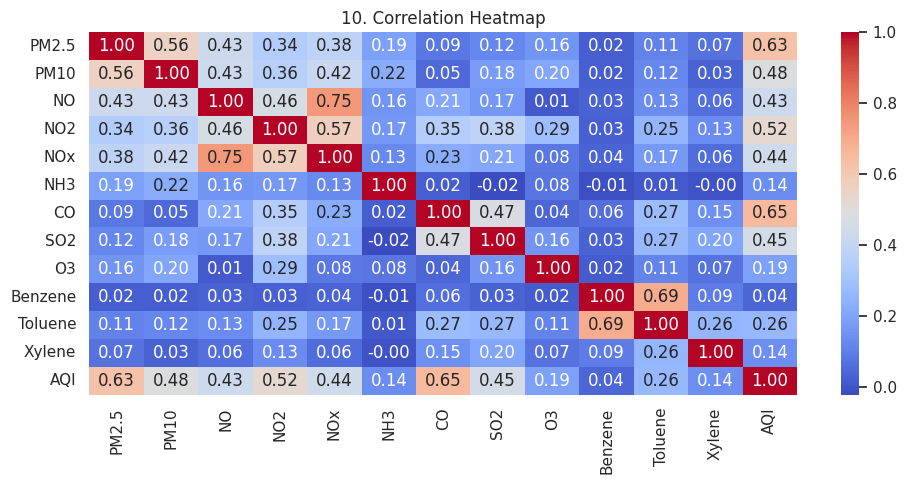

In [11]:
#10. Correlation Heatmap
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("10. Correlation Heatmap")
plt.tight_layout()
plt.show()